# Percolation Group 1

### Always run this cell before working on the code

In [4]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

## 1 (core)

In [5]:

def display_rand_grid(grid_size, p_yellow):
    '''
    A function to display a random square grid of blue and yellow squares.
    First argument is the side length and the second is the probability that a square is yellow
    '''

    colours = np.random.rand(grid_size, grid_size)  # Initialise 2d array of random numbers between 0 and 1
    colours = colours < p_yellow  # Sets each cell to 1 if it's less than p_yellow, else 0.

    plt.figure(figsize=(6,6))  #set appropriate figure size
    plt.title("probability = " + str(p_yellow))  # Adds title showing probability of a point being filled yellow
    plt.pcolor(colours, cmap="plasma")  # Makes the graph a rectangular grid plot with yellow and blue colour scheme
    plt.gca().set_aspect('equal')   #set equal aspect ratio
    plt.plot() #Plots the grid
    plt.show()
    return colours
    
def display_grid(grid):
    
    plt.figure(figsize=(6,6))  #set appropriate figure size
    plt.pcolor(grid, cmap="plasma")  # Makes the graph a rectangular grid plot with yellow and blue colour scheme
    plt.gca().set_aspect('equal')   #set equal aspect ratio
    plt.plot() #Plots the grid
    plt.show()
    return None
    

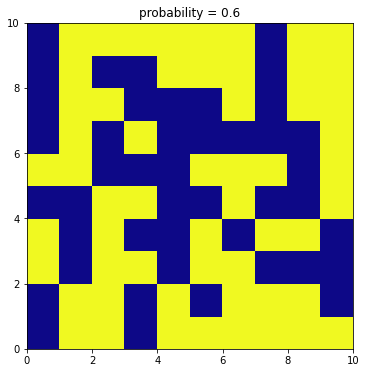

In [6]:
mygrid = display_rand_grid(10, 0.6)

In [7]:
def generate_grid(grid_size, p_yellow):
    '''
    Given grid size and probability of a square being yellow, this outputs
    a numpy array of booleans, with true representing yellow
    '''
    
    colours = np.random.rand(grid_size, grid_size)  # Initialise 2d array of random numbers between 0 and 1
    colours = colours < p_yellow  # Sets each cell to 1 if it's less than p_yellow, else 0.
    return colours
    
    

## 2 (core)

In [191]:
def find_yellow_path(grid,show_path=False):
    '''
    For a numpy array of booleans (the yellow/blue grid), this function returns True or False
    depending on whether or not a yellow path exists from the left to the right edge.
    It will also display the path if you pass True
    This is not efficient
    '''
    
    #we know all the yellows on the left are reachable
    grid_size = np.shape(grid)
    side_length = grid_size[0]
    #we make an array of the same size as the grid to store
    #which squares we can reach. Initially we assume we can't reach any
    #0 represents a square is unreachable
    reachable = np.full(grid_size, 0)
    #yellows is a list of arrays which contain the coordinates of each yellow square
    yellows = np.argwhere(grid == True)
    #storing all the 0th column yellows as reachable
    #1 represents a square is reachable
    for square in yellows:
        y,x = square
        if x == 0:
            reachable[y,x] = 1
    
    # Creates an array of all coordinates of sites already checked
    reachable_array = np.asarray(np.where(reachable == 1)).T.tolist()
    
    #now we search for adjacent yellow squares to the ones we already have
    #we keep searching through each element of reachable until we don't find any new squares
    end = False
    while end == False:
        #the counter keeps track of how many new reachable squares are found
        #every time the loop below repeats
        counter = 0
        # iterates over our array of coordinates of reachable sites
        # assigns y and x for each site so that we can later compare to neighbouring sites
        for site in reachable_array:
            y = site[0]
            x = site[1]
            # ends the while loop as soon as a site on the RHS is shown to be reachable
            if x == side_length-1:
                end = True
            #check adjacent
            #the first ifs in each part stops us getting index out of bounds errors
            #we check !=1 because otherwise we'd find the same squares again
            #and it would loop forever
            else:
                if x<side_length-1:
                    #checks right
                    if grid[y,x+1] == True and [y,x+1] not in reachable_array:
                        reachable[y,x+1] = 1
                        reachable_array.append([y,x+1])
                        counter+=1
                if y-1>=0:
                    #checks below
                    if grid[y-1,x] == True and [y-1,x] not in reachable_array:
                        reachable[y-1,x] = 1
                        reachable_array.append([y-1,x])
                        counter+=1
                if y<side_length-1:
                    #checks above
                    if grid[y+1,x] == True and [y+1,x] not in reachable_array:
                        reachable[y+1,x] = 1
                        reachable_array.append([y+1,x])
                        counter+=1
                if x-1>=0:
                    #checks left
                    if grid[y,x-1] == True and [y,x-1] not in reachable_array:
                        reachable[y,x-1] = 1
                        reachable_array.append([y,x-1])
                        counter+=1
        #if no new squares are found, the while loop ends
        if counter == 0:
            end = True
    
    # displays the input grid if show_path is set to true 
    if show_path == True:
        display_grid(reachable)
    
    #this searches the last column of reachable for the value 1
    #if 1 is found then there must be a reachable square on the RHS.
    #if 1 is not found then there cannot be
    if 1 in reachable[:,side_length-1]:
        return True
    else:
        return False


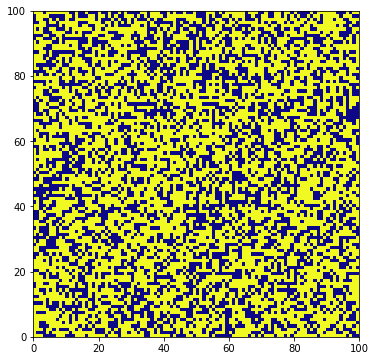

In [188]:
mygrid = generate_grid(100, 0.6)
display_grid(mygrid)

In [194]:
%timeit find_yellow_path(mygrid,False)

415 ms ± 3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


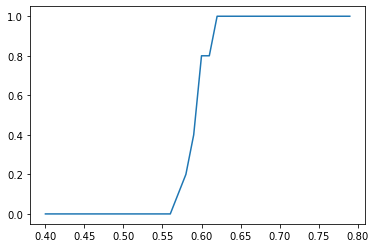

In [185]:
def Fn(trials, n, p):
    
    count = 0
    
    for i in range(trials):
        grid = generate_grid(n, p)
        if find_yellow_path(grid, False):
            count += 1
    
    return 1.0 * count/trials
        
    
def plot_Fn(trials, n):
    
    x_vals = np.arange(0.4, 0.8, 0.01)    
    y_vals = [Fn(trials, n, p) for p in x_vals]
    
    plt.plot(x_vals, y_vals)
    
plot_Fn(10, 100)